<a href="https://colab.research.google.com/github/harshrjain/EDA/blob/main/21BDS0013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WINTER SEMESTER 2024-25

DIGITAL ASSESSMENT

NAME: Harsh R Jain

REG NO.: 21BDS0013

COURSE: EXPLORATORY DATA ANALYSIS

COURSE CODE: BCSE331L

Github Link: https://github.com/harshrjain/EDA

Colab Link: https://colab.research.google.com/github/harshrjain/EDA/blob/main/21BDS0013.ipynb

In [57]:
print(1)

1


Module 1

Data Exploration and Initial Analysis

The dataset was imported and examined to understand its structure, data types, and completeness. Key operations included displaying sample records, generating summary statistics, identifying missing values, and analyzing categorical feature diversity. These steps provided a foundation for further data transformations and insights.

In [58]:
import pandas as pd
import numpy as np

In [59]:
# 1. Import the dataset
df = pd.read_csv("https://raw.githubusercontent.com/harshrjain/EDA/refs/heads/main/CreditCard.csv")

In [60]:
# 2. Preview the first 10 records to understand the data structure
print("Displaying the first 10 rows of the dataset:")
display(df.head(10))

Displaying the first 10 rows of the dataset:


,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [61]:
# 3. Get an overview of the dataset, including column data types and non-null values
print("\nOverview of the dataset:")
df.info()


Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


In [62]:
# 4. Generate descriptive statistics for numerical columns
print("\nStatistical summary of numerical columns:")
display(df.describe())


Statistical summary of numerical columns:


,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [63]:
# 5. Identify any missing values in the dataset
print("\nChecking for missing values in each column:")
print(df.isnull().sum())


Checking for missing values in each column:
rownames       0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


In [64]:
# 6. Examine the uniqueness of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nNumber of unique values in categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()} unique values")


Number of unique values in categorical features:
card: ['yes' 'no'] unique values
owner: ['yes' 'no'] unique values
selfemp: ['no' 'yes'] unique values


Data Cleaning and Transformation

Performed necessary data preprocessing steps, including handling missing values, encoding categorical variables, and deriving new features. Additional transformations such as binning numerical values, merging datasets, and filtering records were applied to enhance data usability for further analysis.

In [65]:
import warnings

# 1. Divide the dataset into two sections and recombine
df1 = df.iloc[:len(df)//2]
df2 = df.iloc[len(df)//2:]
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [66]:
# 2. Merge datasets horizontally
df_side_by_side = pd.concat([df1, df2], axis=1)
df_side_by_side.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,...,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1.0,yes,0.0,37.66667,4.5200,0.033270,124.983300,yes,no,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,yes,0.0,33.25000,2.4200,0.005217,9.854167,no,no,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,yes,0.0,33.66667,4.5000,0.004156,15.000000,yes,no,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,yes,0.0,30.50000,2.5400,0.065214,137.869200,no,no,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,yes,0.0,32.16667,9.7867,0.067051,546.503300,yes,no,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,yes,0.0,23.25000,2.5000,0.044438,91.996670,no,no,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,yes,0.0,27.91667,3.9600,0.012576,40.833330,no,no,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,yes,0.0,29.16667,2.3700,0.076434,150.790000,yes,no,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,yes,0.0,37.00000,3.8000,0.245628,777.821700,yes,no,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,yes,0.0,28.41667,3.2000,0.019780,52.580000,no,no,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# 3. Perform an inner join using 'owner' as a common column
df_merge_inner = df1.merge(df2, on='owner', how='inner')
df_merge_inner.head(10)

,rownames_x,card_x,reports_x,age_x,income_x,share_x,expenditure_x,owner,selfemp_x,dependents_x,...,reports_y,age_y,income_y,share_y,expenditure_y,selfemp_y,dependents_y,months_y,majorcards_y,active_y
0,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,23.25000,1.434,0.000837,0.000000,no,0,12,1,6
1,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,38.91667,3.680,0.019523,59.619170,no,3,44,1,11
2,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,23.83333,2.550,0.000471,0.000000,no,2,24,1,0
3,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,4,37.25000,3.500,0.000343,0.000000,no,2,15,1,9
4,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,28.25000,2.300,0.164496,315.201700,no,1,13,0,4
5,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,41.25000,3.600,0.152524,457.487500,no,3,68,1,10
6,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,34.75000,2.000,0.003300,4.583333,no,2,38,1,6
7,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,31.50000,2.850,0.313700,745.038300,no,2,30,1,11
8,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,24.00000,3.095,0.069859,180.177500,no,1,12,1,23
9,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,25.16667,1.500,0.089805,111.839200,no,1,14,1,19


In [68]:
# 4. Apply a left join to preserve all entries from the first section
df_merge_left = df1.merge(df2, on='owner', how='left')
df_merge_left.head(10)

,rownames_x,card_x,reports_x,age_x,income_x,share_x,expenditure_x,owner,selfemp_x,dependents_x,...,reports_y,age_y,income_y,share_y,expenditure_y,selfemp_y,dependents_y,months_y,majorcards_y,active_y
0,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,23.25000,1.434,0.000837,0.000000,no,0,12,1,6
1,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,38.91667,3.680,0.019523,59.619170,no,3,44,1,11
2,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,23.83333,2.550,0.000471,0.000000,no,2,24,1,0
3,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,4,37.25000,3.500,0.000343,0.000000,no,2,15,1,9
4,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,28.25000,2.300,0.164496,315.201700,no,1,13,0,4
5,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,41.25000,3.600,0.152524,457.487500,no,3,68,1,10
6,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,34.75000,2.000,0.003300,4.583333,no,2,38,1,6
7,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,31.50000,2.850,0.313700,745.038300,no,2,30,1,11
8,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,24.00000,3.095,0.069859,180.177500,no,1,12,1,23
9,1,yes,0,37.66667,4.52,0.03327,124.9833,yes,no,3,...,0,25.16667,1.500,0.089805,111.839200,no,1,14,1,19


In [69]:
# 5. Apply a right join to retain all entries from the second section
df_merge_right = df1.merge(df2, on='owner', how='right')
df_merge_right.head(10)

,rownames_x,card_x,reports_x,age_x,income_x,share_x,expenditure_x,owner,selfemp_x,dependents_x,...,reports_y,age_y,income_y,share_y,expenditure_y,selfemp_y,dependents_y,months_y,majorcards_y,active_y
0,1,yes,0,37.66667,4.5200,0.033270,124.98330,yes,no,3,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
1,3,yes,0,33.66667,4.5000,0.004156,15.00000,yes,no,4,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
2,5,yes,0,32.16667,9.7867,0.067051,546.50330,yes,no,2,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
3,8,yes,0,29.16667,2.3700,0.076434,150.79000,yes,no,0,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
4,9,yes,0,37.00000,3.8000,0.245628,777.82170,yes,no,0,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
5,11,yes,0,30.50000,3.9500,0.078025,256.66420,yes,no,1,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
6,12,no,0,42.00000,1.9800,0.000606,0.00000,yes,no,2,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
7,13,no,0,30.00000,1.7300,0.000694,0.00000,yes,no,1,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
8,14,yes,0,28.83333,2.4500,0.038796,78.87417,yes,no,0,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6
9,15,yes,0,35.33333,1.9080,0.026907,42.61500,yes,no,2,...,0,23.25,1.434,0.000837,0.0,no,0,12,1,6


In [70]:
# 6. Transform the dataset structure using stack and unstack
reshaped_df = df[['income', 'age', 'expenditure']]
stacked = reshaped_df.stack()
stacked.unstack().head(10)

,income,age,expenditure
0,4.5200,37.66667,124.983300
1,2.4200,33.25000,9.854167
2,4.5000,33.66667,15.000000
3,2.5400,30.50000,137.869200
4,9.7867,32.16667,546.503300
5,2.5000,23.25000,91.996670
6,3.9600,27.91667,40.833330
7,2.3700,29.16667,150.790000
8,3.8000,37.00000,777.821700
9,3.2000,28.41667,52.580000


In [71]:
# 7. Combine multiple Series objects
df_series1 = pd.Series([100, 200, 300], index=['A', 'B', 'C'])
df_series2 = pd.Series([400, 500, 600], index=['D', 'E', 'F'])
df_combined_series = pd.concat([df_series1, df_series2], keys=['Group1', 'Group2'])
df_combined_series.unstack()

,A,B,C,D,E,F
Group1,100.0,200.0,300.0,NaN,NaN,NaN
Group2,NaN,NaN,NaN,400.0,500.0,600.0


In [72]:
# 8. Identify redundant entries in the dataset
df.duplicated().sum()

np.int64(0)

In [73]:
# 9. Eliminate duplicate records to ensure uniqueness
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [74]:
# 10. Modify categorical values by mapping them to numerical representations
df_replace = df.copy()
warnings.simplefilter(action='ignore', category=FutureWarning)
df_replace.replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace=True)
df_replace.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


Note to self: No missing values in the dataset.

I am still doing all the operations for the EDA process. ==> Does not have any effect on the data

In [75]:
# 11. Identify missing values in each column
df.isnull().sum()

,0
rownames,0
card,0
reports,0
age,0
income,0
share,0
expenditure,0
owner,0
selfemp,0
dependents,0


In [76]:
# 12. Remove entries with missing values
df_cleaned = df.dropna()
df_cleaned.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [77]:
# 13. Fill missing values with zero for numerical consistency
df_filled = df.fillna(0)
df_filled.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [78]:
# 14. Use forward fill to propagate last valid observation forward
df_ffill = df.fillna(method='ffill')
warnings.simplefilter(action='ignore', category=FutureWarning)
df_ffill.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [79]:
# 15. Apply backward fill to use the next valid observation
df_bfill = df.fillna(method='bfill')
warnings.simplefilter(action='ignore', category=FutureWarning)
df_bfill.head(10)

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [80]:
# 16. Categorize numerical data into predefined bins
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins, labels=labels)
df['Age_Group'].value_counts()

,count
Age_Group,
Adult,729
Young,287
Middle-aged,280
Senior,23


In [81]:
# 17. Divide numerical values into quartiles for better segmentation
df['Income_Quartile'] = pd.qcut(df['income'], 4)
df['Income_Quartile'].value_counts()

,count
Income_Quartile,
"(2.9, 4.0]",357
"(2.244, 2.9]",332
"(0.209, 2.244]",330
"(4.0, 13.5]",300


In [82]:
# 18. Filter out customers with high expenditure
df[df['expenditure'] > 1500]

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Age_Group,Income_Quartile
29,30,yes,0,40.00000,5.5000,0.334460,1532.773,yes,no,4,74,1,19,Adult,"(4.0, 13.5]"
56,57,yes,0,34.33333,4.8000,0.474508,1898.033,no,no,3,12,1,1,Adult,"(4.0, 13.5]"
446,447,yes,0,51.58333,12.4999,0.297555,3099.505,yes,no,1,120,1,21,Middle-aged,"(4.0, 13.5]"
460,461,yes,1,33.91667,2.0000,0.906320,1510.534,no,no,0,12,1,5,Adult,"(0.209, 2.244]"
518,519,yes,0,38.83333,6.5000,0.289787,1569.677,yes,no,4,117,1,18,Adult,"(4.0, 13.5]"
586,587,yes,1,29.83333,3.7000,0.595776,1836.976,no,no,0,24,1,7,Adult,"(2.9, 4.0]"
623,624,yes,0,27.16667,2.6000,0.877846,1902.000,no,no,0,4,1,7,Adult,"(2.244, 2.9]"
762,763,yes,0,35.25000,6.0000,0.458235,2291.174,no,no,2,10,1,0,Adult,"(4.0, 13.5]"
764,765,yes,0,44.50000,9.0000,0.259993,1949.862,no,no,2,4,1,7,Middle-aged,"(4.0, 13.5]"
1030,1031,yes,0,32.66667,3.6500,0.538365,1637.527,yes,no,1,32,1,7,Adult,"(2.9, 4.0]"


In [83]:
# 19. Extract records with significantly high expenditure
df[df['expenditure'] > 2000]

,rownames,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Age_Group,Income_Quartile
446,447,yes,0,51.58333,12.4999,0.297555,3099.505,yes,no,1,120,1,21,Middle-aged,"(4.0, 13.5]"
762,763,yes,0,35.25000,6.0000,0.458235,2291.174,no,no,2,10,1,0,Adult,"(4.0, 13.5]"
1188,1189,yes,0,47.33333,10.4000,0.230948,2001.547,yes,no,2,9,0,0,Middle-aged,"(4.0, 13.5]"


In [84]:
# 20. Compute key statistics for 'income'
mean_income = df['income'].mean()
sum_income = df['income'].sum()
cumsum_income = df['income'].cumsum()

In [85]:
# 21. Display calculated income statistics
print(f"Average Income: {mean_income}")
print(f"Total Income: {sum_income}")
print(f"Cumulative Income:")
print(cumsum_income.head(5))
print(cumsum_income.tail(5))

Average Income: 3.3653760424564068
Total Income: 4438.9310000000005
Cumulative Income:
0     4.5200
1     6.9400
2    11.4400
3    13.9800
4    23.7667
Name: income, dtype: float64
1314    4423.739
1315    4426.931
1316    4431.531
1317    4435.231
1318    4438.931
Name: income, dtype: float64


Statistical Analysis and Visualization

This module computes key statistics like mean, median, and variance to understand data distribution. Visualizations, including bar charts, histograms, and scatter plots, reveal patterns and relationships, while correlation analysis highlights dependencies among features.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# 1. Compute mean, median, and mode for 'income'
mean_val = df['income'].mean()
median_val = df['income'].median()
mode_val = df['income'].mode()[0]

print(f"Mean Income: {mean_val}, Median Income: {median_val}, Mode Income: {mode_val}")

Mean Income: 3.3653760424564068, Median Income: 2.9, Mode Income: 3.0


In [87]:
# 2. Calculate standard deviation & variance of 'income'
std_dev = df['income'].std()
variance = df['income'].var()

print(f"Standard Deviation: {std_dev}, Variance: {variance}")

Standard Deviation: 1.6939017383269122, Variance: 2.8693030991069346


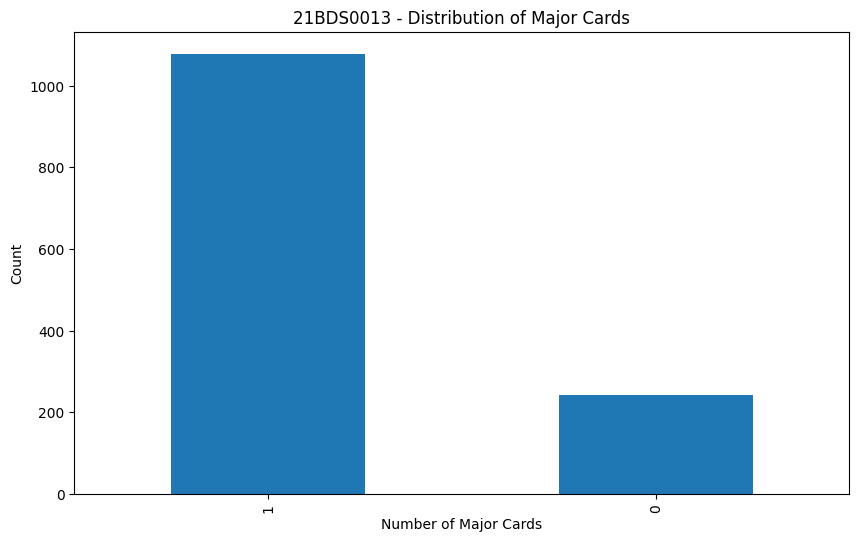

In [88]:
# 3. Bar chart for top 10 'majorcards' counts
df['majorcards'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,6))
plt.title("21BDS0013 - Distribution of Major Cards")
plt.xlabel("Number of Major Cards")
plt.ylabel("Count")
plt.show()

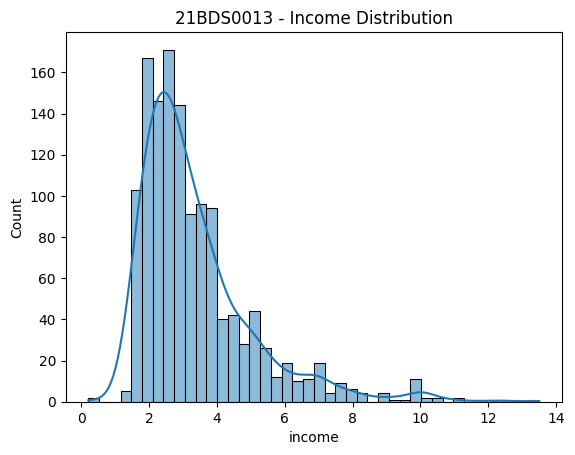

In [89]:
# 4. Histogram to visualize income distribution
sns.histplot(df['income'], kde=True)
plt.title("21BDS0013 - Income Distribution")
plt.show()

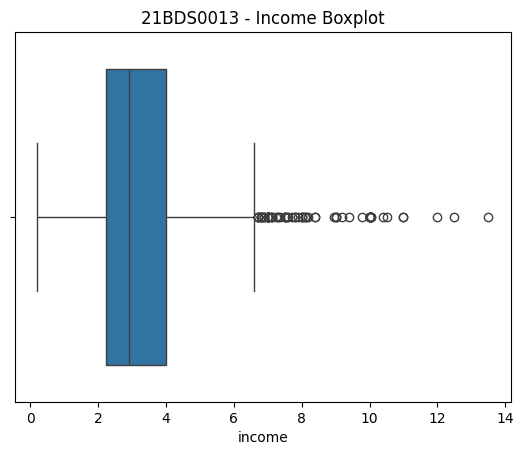

In [90]:
# 5. Boxplot to detect outliers in 'income'
sns.boxplot(x=df['income'])
plt.title("21BDS0013 - Income Boxplot")
plt.show()

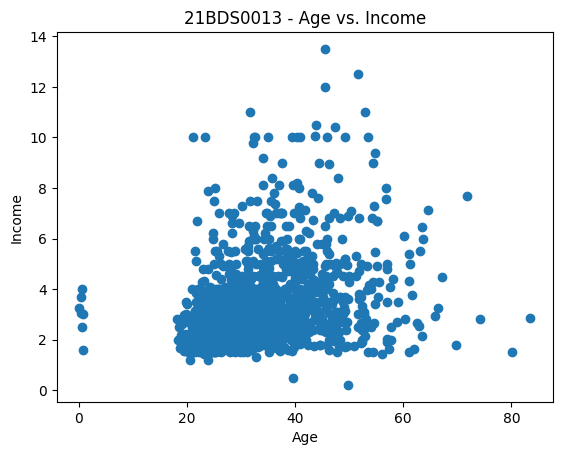

In [91]:
# 6. Scatter plot between 'age' and 'income'
plt.scatter(df['age'], df['income'])
plt.title("21BDS0013 - Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [92]:
# 7. Compute correlation between 'age' and 'income'
df_clean = df[['age', 'income']].dropna()
corr_coeff = np.corrcoef(df_clean['age'], df_clean['income'])[0,1]
print(f"Correlation Coefficient (Age & Income): {corr_coeff}")

Correlation Coefficient (Age & Income): 0.3246531986727648


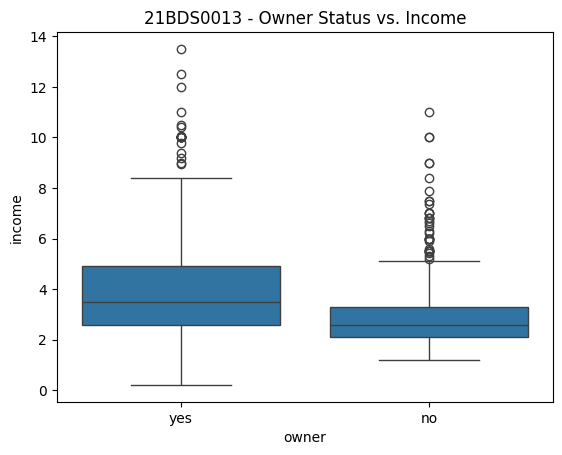

In [93]:
# 8. Boxplot comparing 'income' across 'owner' status
sns.boxplot(x='owner', y='income', data=df)
plt.title("21BDS0013 - Owner Status vs. Income")
plt.show()

In [94]:
# 9. Convert relevant columns to numeric format
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df_clean = df.dropna(subset=['income', 'age'])

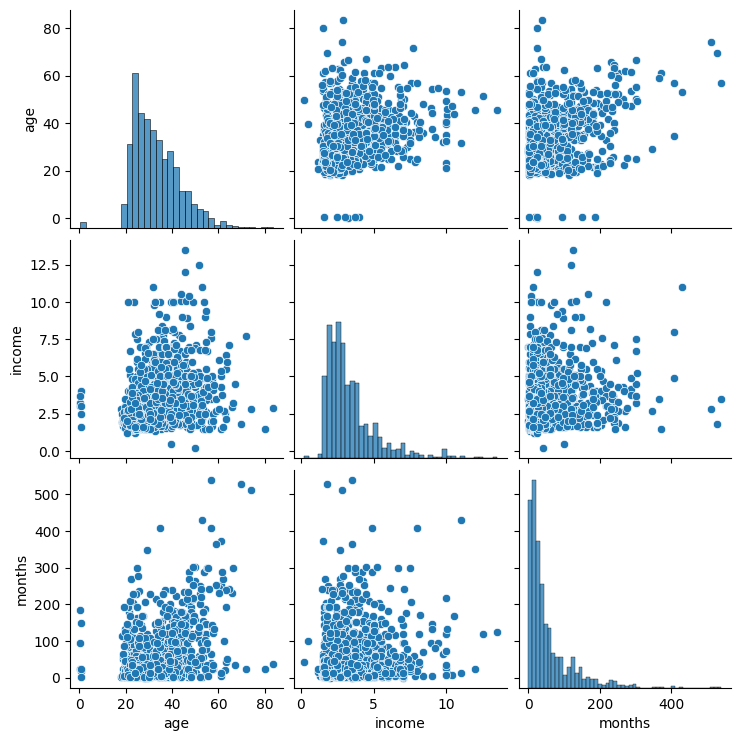

In [95]:
# 10. Pairplot for 'age', 'income', and 'months'
sns.pairplot(df_clean, vars=['age', 'income', 'months'])
plt.show()

In [96]:
# 11. Fill missing values in 'income' and 'age' with median
df.loc[:, 'income'] = df['income'].fillna(df['income'].median())
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())

In [97]:
# 12. Compute Pearson correlation between 'age' and 'income'
pearson_corr = stats.pearsonr(df['age'], df['income'])
print(f"Pearson Correlation: {pearson_corr[0]}")

Pearson Correlation: 0.32465319867276476


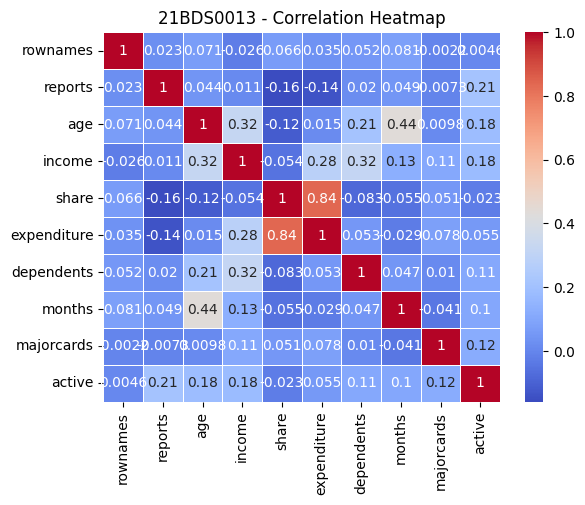

In [98]:
# 13. Correlation heatmap for numerical columns
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("21BDS0013 - Correlation Heatmap")
plt.show()

Module 4

In [99]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/harshrjain/EDA/refs/heads/main/CreditCard.csv")

# Choose numerical column for 1D analysis
num_col = "income"

# Summary statistics
mean_val = df[num_col].mean()
median_val = df[num_col].median()
mode_val = df[num_col].mode().values[0]
skewness_val = df[num_col].skew()
kurtosis_val = df[num_col].kurt()

# Print statistics
print("Summary Statistics:")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"Kurtosis: {kurtosis_val:.2f}")


Summary Statistics:
Mean: 3.37
Median: 2.90
Mode: 3.00
Skewness: 1.93
Kurtosis: 4.93


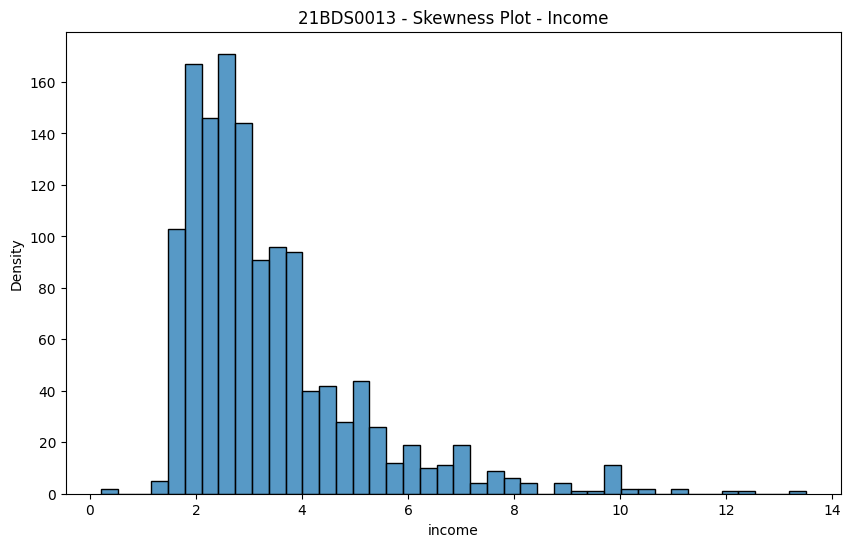

In [100]:
#1. Skewness Plot
plt.figure(figsize=(10, 6))
sns.histplot(df[num_col], kde=False)
plt.title("21BDS0013 - Skewness Plot - Income")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()

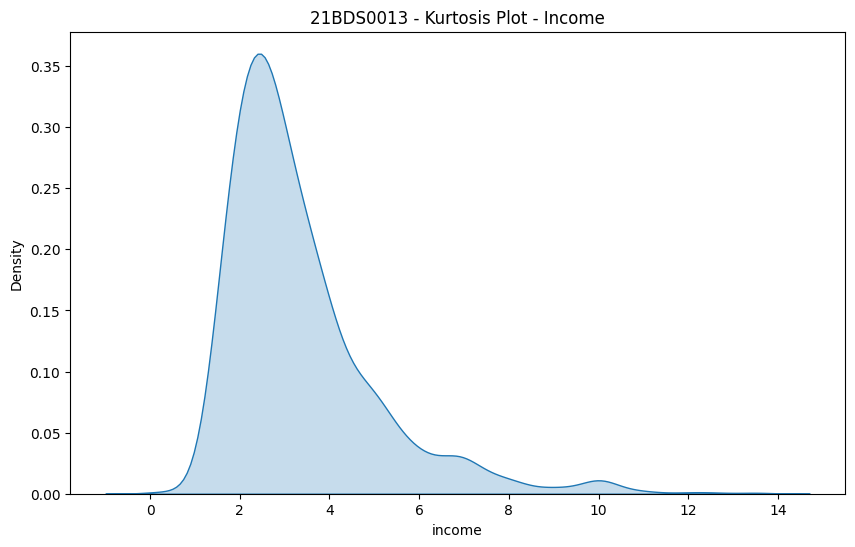

In [101]:
#2. Kurtosis Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df[num_col], fill=True)
plt.title("21BDS0013 - Kurtosis Plot - Income")
plt.xlabel(num_col)
plt.ylabel("Density")
plt.show()


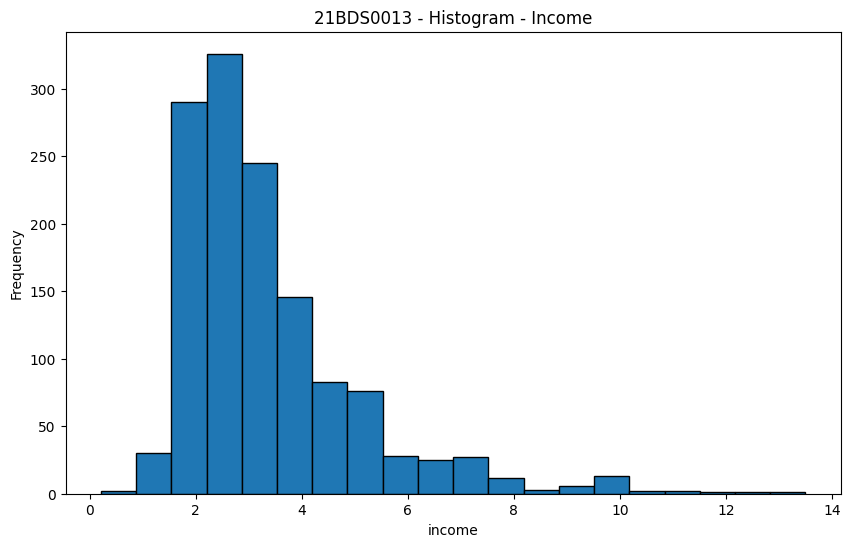

In [102]:
#3. Histogram
plt.figure(figsize=(10, 6))
df[num_col].plot.hist(bins=20, edgecolor="black")
plt.title("21BDS0013 - Histogram - Income")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()


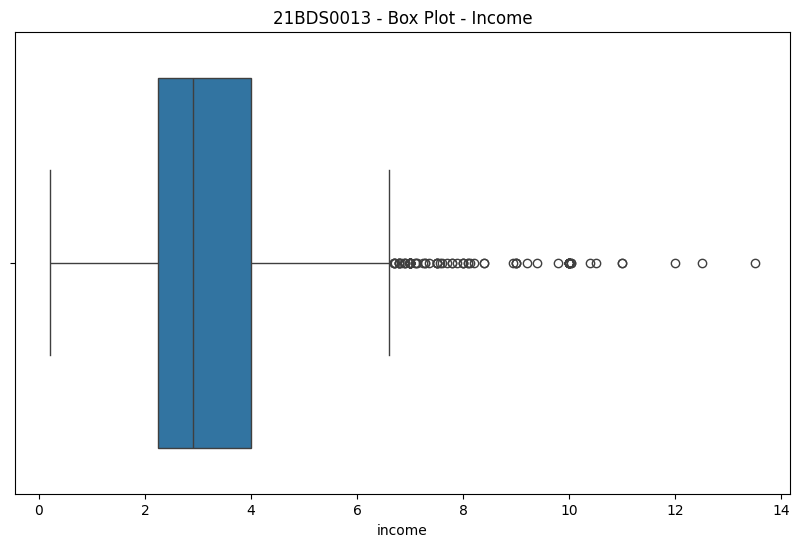

In [103]:
#4. bixplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[num_col])
plt.title("21BDS0013 - Box Plot - Income")
plt.xlabel(num_col)
plt.show()

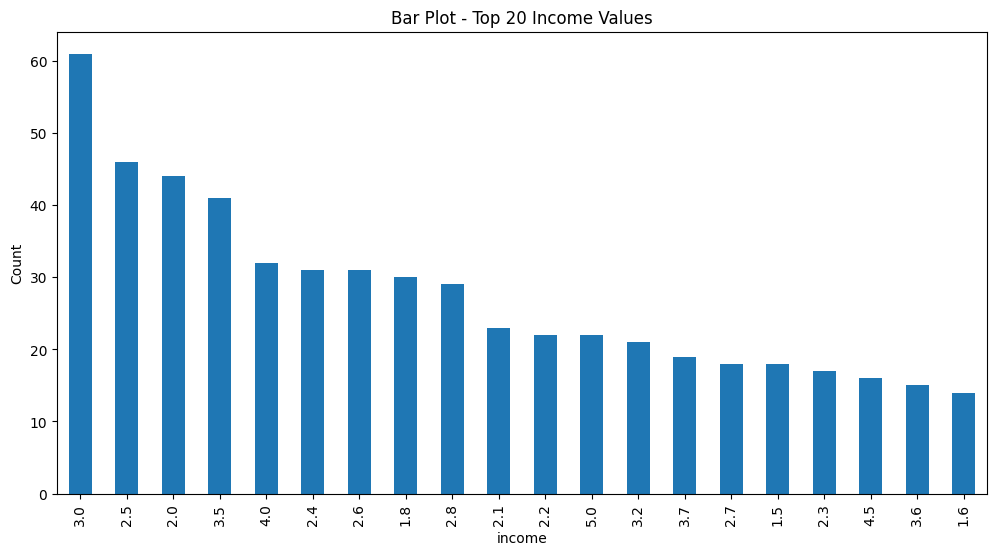

In [104]:
#5. Bar Plot (value counts)
plt.figure(figsize=(12, 6))
df[num_col].value_counts().head(20).plot(kind="bar")
plt.title("Bar Plot - Top 20 Income Values")
plt.xlabel(num_col)
plt.ylabel("Count")
plt.show()


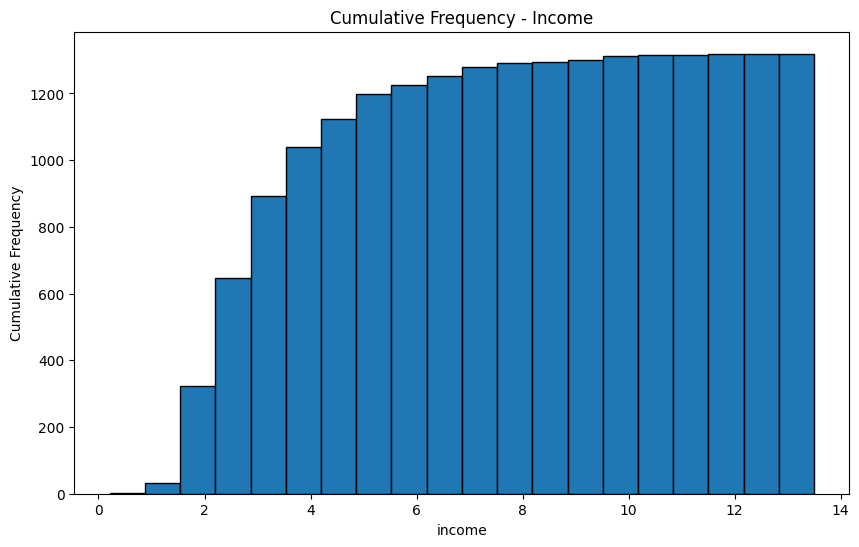

In [105]:
#6. Cumulative Frequency Plot
plt.figure(figsize=(10, 6))
df[num_col].plot(kind="hist", cumulative=True, bins=20, edgecolor="black")
plt.title("Cumulative Frequency - Income")
plt.xlabel(num_col)
plt.ylabel("Cumulative Frequency")
plt.show()


In [106]:
#7. Ternary Plot: Income vs. Expenditure vs. Share
import pandas as pd
import matplotlib.pyplot as plt
import ternary

# Select top 5 rows with non-zero total to avoid division by zero
subset = df[["income", "expenditure", "share"]].head(5)
subset = subset[(subset.sum(axis=1) != 0)]

# Normalize each row so that income + expenditure + share = 1
normalized_data = []
for index, row in subset.iterrows():
    total = row.sum()
    if total > 0:
        income_norm = row["income"] / total
        expend_norm = row["expenditure"] / total
        share_norm = row["share"] / total
        normalized_data.append((income_norm, expend_norm, share_norm))

# Create the ternary plot
scale = 1  # Since data is normalized
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=0.1)

# Plot points
for point in normalized_data:
    tax.scatter([point], marker='o', color='blue', s=100)

# Set axis labels
tax.left_corner_label("Expenditure", fontsize=12)
tax.right_corner_label("Share", fontsize=12)
tax.top_corner_label("Income", fontsize=12)

# Ticks and legend
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.set_title("Ternary Plot: Income vs Expenditure vs Share", fontsize=14)
tax.show()


ModuleNotFoundError: No module named 'ternary'